# (Some of my successes on the Computational statistics course, exercises mainly from the home exam)

## 1. The log-probability of a categorical outcome under a softmax model.

A categorical random variable $x$ represents a single discrete choice among $n$ alternatives, e.g. choosing a single integer from $\{0, \dots, n-1\}$. Under the softmax model, the probability of each choice is parametrised with the help of a $n$-dimensional vector $\mathbf{z}$ as
$$ p(x = k) = \frac{\exp(z_k)}{\sum_{j=0}^{n-1} \exp(z_{j})}. $$
Given $k$ and $\mathbf{z}$, the code returns $\log p(x = k)$.

In [81]:
import numpy as np
from scipy.special import gammaln
   
def lp1(k,z):
    n=len(z)
    aa=np.max(z)
    sumexp=0
    for i in range(n):
        sumexp=sumexp+np.exp(z[i]-aa)
    alakerta=aa+np.log(sumexp)
    tulos=z[k]-alakerta
    return tulos

-2.006408868078168
-1.8341398408990786


In [82]:
import numpy as np

lp1(2, np.array([1.0, 2.0, 1.0, 2.0]))

-1.8341398408990786

## 2. Resampling for automatic testing of exercise solutions

We want to obtain 95% confidence intervals for results that will be accepted, if someone obtains interquartile range from some data by bootstrapping it with 1000 iterations, and our computing capacity is limited to n=10000 iterations.


In [4]:
import pandas as pd
import numpy as np
import numpy.random as npr
import scipy.stats as stats

dataframe = pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/toydata.txt', header=None)
data = dataframe.values[:,0]
npr.seed(42)
def luottamusvalit(m, data):
    bootstrappisetti = np.zeros((m,2))
    n=len(data)
    for i in range(m):
        indices = npr.choice(range(n), size=n)
        bootstrappisetti[i]=np.percentile(data[indices], [2.5,97.5])
    return bootstrappisetti
#np.percentile(bootstrappisetti, [2.5, 97.5])

def luottamusvalit2(m):
    bootstrappisetti = np.zeros(m)
    n=len(data)
    for i in range(m):
        indices = npr.choice(range(n), size=n)
        bootstrappisetti[i]=np.abs((np.percentile(a=data[indices], q=0.25)-np.percentile(a=data[indices], q=0.75)))
    return bootstrappisetti

datamme=luottamusvalit2(1000)
valeja=luottamusvalit(10000, datamme)

alaraja=valeja[:,0]
ylaraja=valeja[:,1]

lv3=np.percentile(alaraja, [2.5,97.5])
lv4=np.percentile(ylaraja, [2.5,97.5])

print("95% confidence interval for lower part:", lv3)
print("95% confidence interval for upper part:", lv4)




95% confidence interval for lower part: [0.005491   0.02071501]
95% confidence interval for upper part: [1.11994276 1.13713558]


### How does the solution work:

My solution is to sample 10 00 bootstrap sets of IQR values (lets call them A) and treat them like a new population. Then sample from A a sample of 10 000 confidence intervals (let's call it sample B), and based by the sample B calculate the confidence intervals for the upper part of the interval and for the lower part of the interval.


## 3. Converges or not?
Below are some trace plots from unthinned random walk Metropolis-Hastings samplers sampling from a continuous distribution. Warm-up iterations have been excluded from the plots. Have the samples converged? Are the samples well tuned?

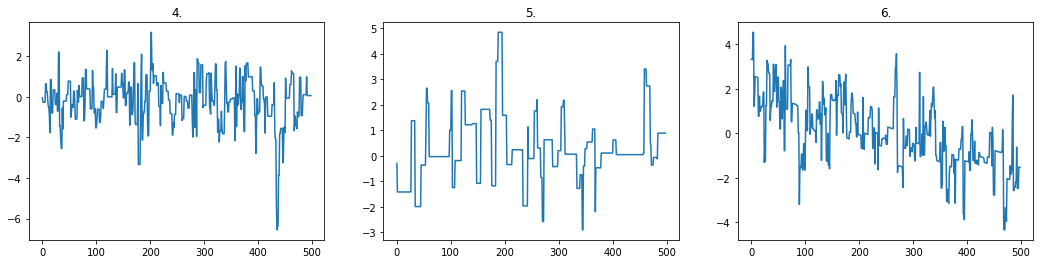

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(18,4))
h = ax[0].plot(pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/trace1.txt').values)
h = ax[0].set_title('4.')
h = ax[1].plot(pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/trace2.txt').values)
h = ax[1].set_title('5.')
h = ax[2].plot(pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/trace3.txt').values)
h = ax[2].set_title('6.')

My answers   
Which samplers appear to have converged  
4\. converged 
5\. converged
6\. not converged  

Justification:
6: when iterations grow the sampler samples smaller values, so the sampler has not converged to a stationary phase  
In 4,5 the walk clearly does not go persistently to any direction but is more or less stationary

Are the samples well tuned:     
4\. well tuned 
5\. not well tuned  
6\. well tuned 

Justification:  
4\. the walk does not oscillate too much except for one point, longer MCMC run probably required  
5\. the walk steps are too big, it will take time until the walk "settles" on some level  
6\. the sampler does not converge, but the steps are well tuned as the oscillation of the step lengths is not too big